In [1]:
%matplotlib inline

This page, first, loads a csv file including quantitative evaluation of BRAINSABC results on BrainWeb data.
Then, different plots are shown based on different methods in BRAINSABC.

^^^^^^^^^
/Shared/johnsonhj/HDNI/20151105_BABC_on_BrainWeb_data/ai_msles2
^^^^^^^^^

In each plot, x-axis is 'noise', and y-axis is 'dice index'.

In [2]:
import numpy as np
import pandas as pd
from ggplot import *

In [6]:
'''
Initial results related to old version of BABC right before and after pure plugs
Computed from Results directories.
'''
#csv_fn='/Shared/johnsonhj/HDNI/20151105_BABC_on_BrainWeb_data/ai_msles2/EVALUATIONS_SEG/statistics.csv'

'''
Results presented in my proposal.
These results are created based on following HEADs of BRIANSTools:

*Old BRAINSTools: /Shared/pinc/sharedopt/20150327/RHEL6/BRAINSTools
 - branch: v20160305

*New BRAINSTools: /Shared/pinc/sharedopt/20150824/RHEL6/BRAINSTools
 - branch: v20160305

To create above results, following atlas definition is used:

/Shared/johnsonhj/HDNI/20151105_BABC_on_BrainWeb_data/customizedAtlasDefinition/ExtendedAtlasDefinition_0.xml

That has SurfGM weight as 1

Also the candiateRegion threshold is set to 0.1.
'''
#csv_fn='/Shared/johnsonhj/HDNI/20151105_BABC_on_BrainWeb_data/ai_msles2/EVALUATIONS_SEG_3mm_20160305/statistics_useCanReg_w10_t01.csv'

'''
Same as above results but following atlas definition is used:
/Shared/johnsonhj/HDNI/20151105_BABC_on_BrainWeb_data/customizedAtlasDefinition/ExtendedAtlasDefinition.xml
That has SurfGM weight as 1.5
'''
#csv_fn='/Shared/johnsonhj/HDNI/20151105_BABC_on_BrainWeb_data/ai_msles2/EVALUATIONS_SEG_3mm_20160305/statistics_useCanReg_w15_t01.csv'

#----------------------------------------------------------
csv_fn='/Shared/johnsonhj/HDNI/20151105_BABC_on_BrainWeb_data/ai_msles2/EVALUATIONS_SEG_3mm_20160305_TEST20170308/statistics_w10.csv'
#----------------------------------------------------------

DataFrame = pd.read_csv(csv_fn)

In [7]:
#for field in ["roi","biasField","usePhysicalSpace","t2resolution","useKnn","usePurePlugs"]:
#    DataFrame[field] = DataFrame[field].astype('category')

# Fifth experiment
Finally, we investigate how incorporating pure plugs mask can improve the segmentation when input modalities are in different resolutions.

In following tests, single modal and multi modal segmentations are run with and without using pure plugs mask.

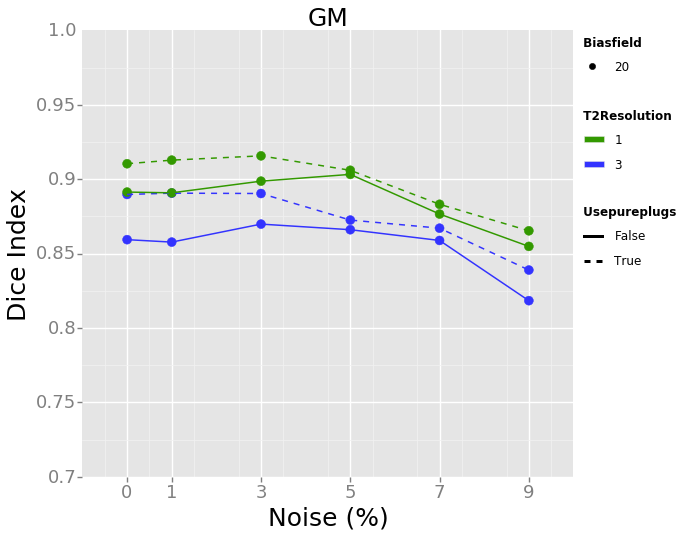

<ggplot: (295674209)>


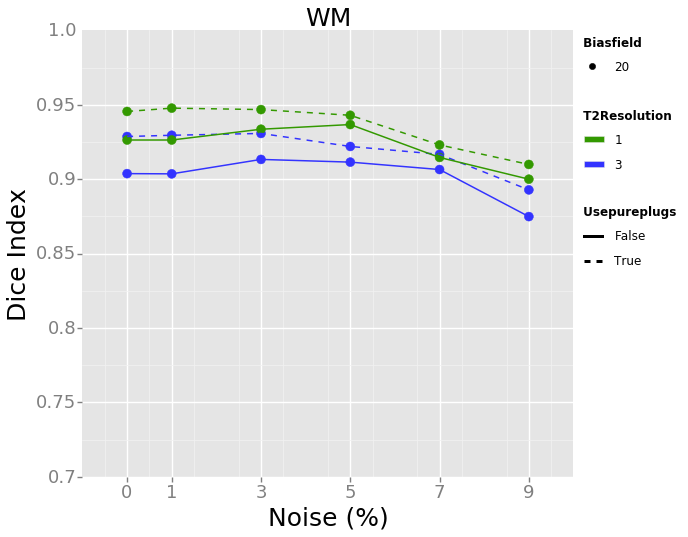

<ggplot: (296915565)>


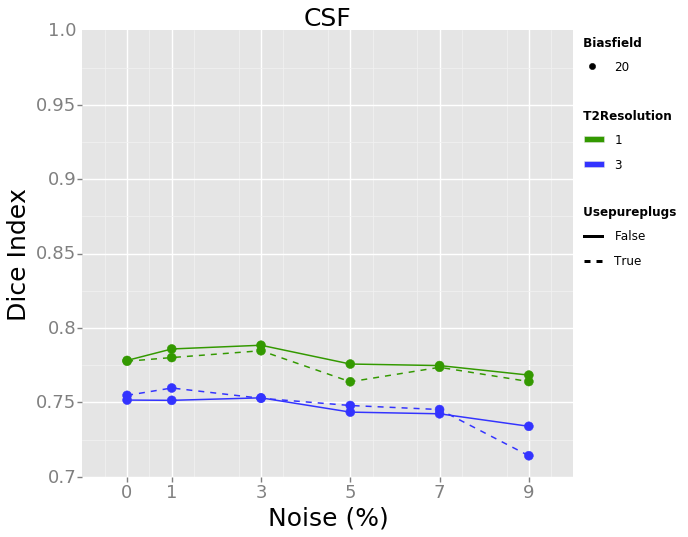

<ggplot: (276561345)>


In [8]:
DataFrame2 = DataFrame.loc[(DataFrame.t2resolution > 0)]
#DataFrame2 = DataFrame
#DataFrame2 = DataFrame_slice.loc[(DataFrame_slice.t2resolution > 0)]
#DataFrame2 = DataFrame_slice
#####
metric='dice';label='Dice Index'
ylim1=0.7;ylim2=1.00

#metric='hausdorffAvg';label='Hausdorff Avg Distance'
#ylim1=0.0;ylim2=0.5
#####

df1 = DataFrame2.loc[(DataFrame2.roi == 'GM') & # tissue region (GM or WM or CSF)
                    (DataFrame2.biasField == 20) & # biasField (0 or 20 or 40)
                    (DataFrame2.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    #(DataFrame2.t2resolution == 1) & # if multimodality + resolution
                    (DataFrame2.useKnn == True) # use knn or not
                    #(DataFrame2.usePurePlugs == False) # use pure plugs or not
                    ]

p1 = ggplot(aes('noise', metric, color='t2resolution', linetype='usePurePlugs', shape='biasField'), data=df1 ) \
+ geom_point(alpha=1,size=80,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.5) \
+ scale_color_manual(values=('#339900','#3333FF')) \
+ labs(x='Noise (%)', y=label, title='GM') \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
print(p1)

df2 = DataFrame2.loc[(DataFrame2.roi == 'WM') & # tissue region (GM or WM or CSF)
                    (DataFrame2.biasField == 20) & # biasField (0 or 20 or 40)
                    (DataFrame2.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    #(DataFrame2.t2resolution == 1) & # if multimodality + resolution
                    (DataFrame2.useKnn == True) # use knn or not
                    #(DataFrame2.usePurePlugs == False) # use pure plugs or not
                    ]

p2 = ggplot(aes('noise', metric, color='t2resolution', linetype='usePurePlugs', shape='biasField'), data=df2 ) \
+ geom_point(alpha=1,size=80,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.5) \
+ scale_color_manual(values=('#339900','#3333FF')) \
+ labs(x='Noise (%)', y=label, title='WM') \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
print(p2)


df3 = DataFrame2.loc[(DataFrame2.roi == 'CSF') & # tissue region (GM or WM or CSF)
                    (DataFrame2.biasField == 20) & # biasField (0 or 20 or 40)
                    (DataFrame2.usePhysicalSpace == True) & # run in physical or voxel space (old or new BABC)
                    #(DataFrame2.t2resolution == 1) & # if multimodality + resolution
                    (DataFrame2.useKnn == True) # use knn or not
                    #(DataFrame2.usePurePlugs == False) # use pure plugs or not
                    ]

p3 = ggplot(aes('noise', metric, color='t2resolution', linetype='usePurePlugs', shape='biasField'), data=df3 ) \
+ geom_point(alpha=1,size=80,) \
+ xlim(-1, 10) \
+ scale_x_continuous(breaks=(0,1,3,5,7,9)) \
+ ylim(ylim1, ylim2) \
+ geom_line(size=1.5) \
+ scale_color_manual(values=('#339900','#3333FF')) \
+ labs(x='Noise (%)', y=label, title='CSF') \
+ theme(axis_title=element_text(size=25),axis_text=element_text(size=18),title=element_text(size=25))
print(p3)

* For GM and WM:
Results show that considering pure plugs in classification always enhances the results, such that multi-modal classification with low resolution T2 and using pure plug masks performs so close to the situation when high resolution T2 is added and pure plugs are not used.

* For CSF:
Adding pure plugs does not cause any meaningful changes to the results.